In [36]:
from PIL import Image

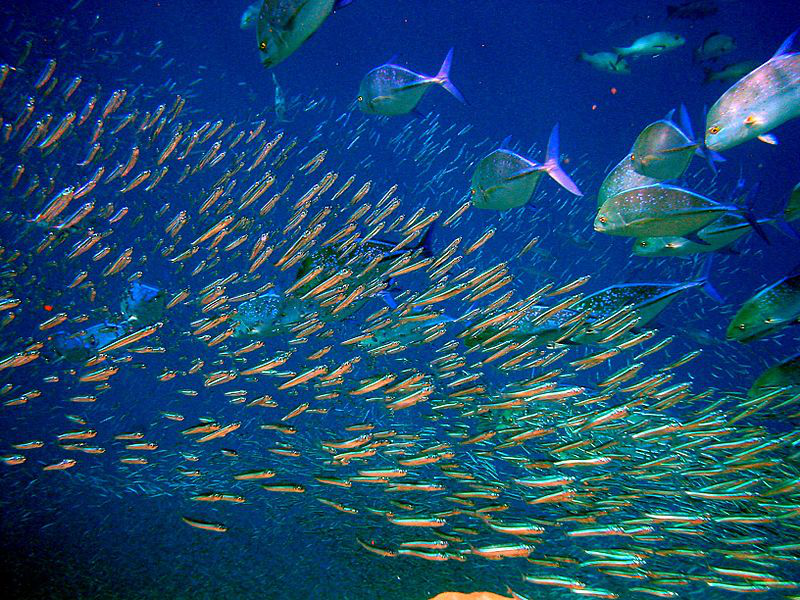

In [37]:
#Background infomation
#Global production of fish and seafood has quadrupled over the past 50 years. 
#Not only has the world population more than doubled over this period, the average person now eats almost twice as much seafood as half a century ago.
#This has increased pressure on fish stocks across the world. 
#Globally, the share of fish stocks which are overexploited – meaning we catch them faster than they can reproduce to sustain population levels – has more than doubled since the 1980s and this means that current levels of wild fish catch are unsustainable.
#Now it is time for us to start caring about fishes!!!

#Our project : 
#Part One - Dataset exploration to have a preview of current fishing industry worldwidely.
#Part two - A model designed to monitor fishes in one area by photos, which could be applied by companies, government and research institutions.


#Dataset from Kaggle : Fish and Overfishing
#https://www.kaggle.com/datasets/sergegeukjian/fish-and-overfishing

Intro = Image.open('/home/lucien/Documents/final_project_Essec/Data_analyse/image.jpeg')
Intro

In [38]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [39]:
#import dataset
Capture = pd.read_csv("/home/lucien/Documents/final_project_Essec/Data_analyse/capture-fisheries-vs-aquaculture.csv")
SFF_prod = pd.read_csv("/home/lucien/Documents/final_project_Essec/Data_analyse/seafood-and-fish-production-thousand-tonnes.csv")
FSsustain = pd.read_csv("/home/lucien/Documents/final_project_Essec/Data_analyse/fish-stocks-within-sustainable-levels.csv")
Consume = pd.read_csv("/home/lucien/Documents/final_project_Essec/Data_analyse/fish-and-seafood-consumption-per-capita.csv")
FC_sect = pd.read_csv("/home/lucien/Documents/final_project_Essec/Data_analyse/global-fishery-catch-by-sector.csv")


In [40]:
#setting the resolution
plt.rcParams['figure.dpi']= 300
plt.rcParams['figure.constrained_layout.use']=True

In [43]:
###check Capture dataset, the dataset contains data of acqualculture production vs capture fisheries production
#Aquaculture production is defined as the cultivated fish and crustaceans taken from marine and inland waters and sea tanks
#Capture fishery refers to all kinds of harvesting of naturally occurring living resources in both marine and freshwater environments.
Capture.dropna()

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0
1,Afghanistan,AFG,1970,60.0,400.0
2,Afghanistan,AFG,1971,60.0,500.0
3,Afghanistan,AFG,1972,60.0,500.0
4,Afghanistan,AFG,1973,60.0,500.0
...,...,...,...,...,...
14659,Zimbabwe,ZWE,2014,10600.0,144885.0
14660,Zimbabwe,ZWE,2015,10600.0,130399.0
14661,Zimbabwe,ZWE,2016,10085.0,129202.0
14662,Zimbabwe,ZWE,2017,10300.0,100710.0


In [85]:
Cmask = Capture['Entity'].str.contains('World')
Capture[Cmask].dropna().groupby(['Entity','Year'],as_index = False)[['Aquaculture production (metric tons)']].sum().sample(5)

,Entity,Year,Aquaculture production (metric tons)
47,World,2007,6.493730e+07
49,World,2009,7.304526e+07
54,World,2014,1.010848e+08
37,World,1997,3.429628e+07
53,World,2013,9.711017e+07


In [84]:
#only focusing on year 
Cap = Capture[Cmask].dropna().groupby(['Year',],as_index = False)[['Aquaculture production (metric tons)','Capture fisheries production (metric tons)']].sum()
Cap.sample(5)

,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
28,1988,1.553110e+07,8.906660e+07
53,2013,9.711017e+07,9.175393e+07
17,1977,6.282015e+06,6.508362e+07
25,1985,1.135435e+07,7.938011e+07
10,1970,3.526017e+06,6.388682e+07


Text(0.5, 0.01, 'year')

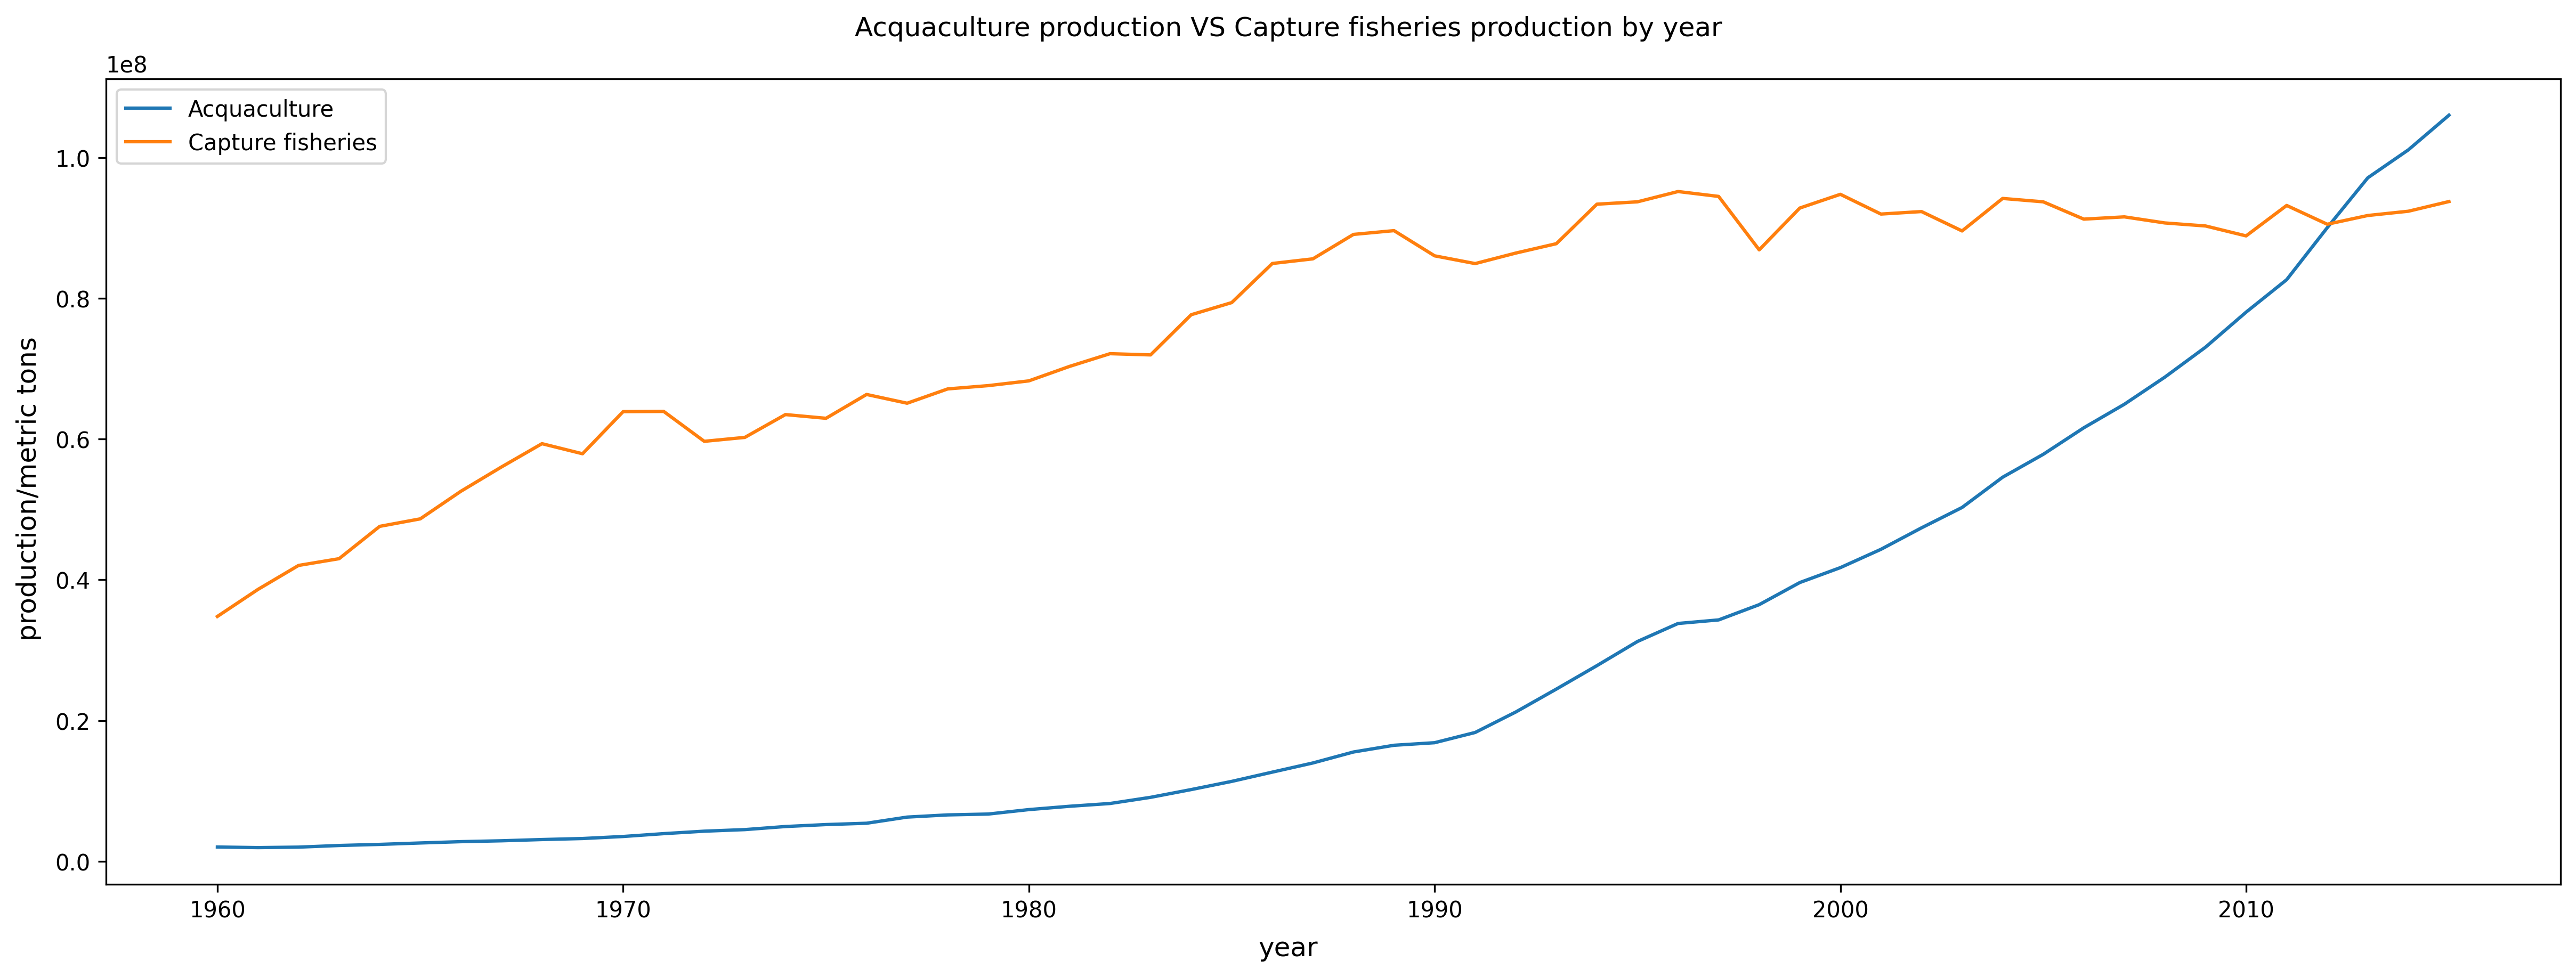

In [86]:
#visualize the data and track it by year
#conclusion: After 2010, people start realizing the importance of protect fishes and start reducing the capture activities
fig, ax = plt.subplots(figsize = (16,6))
ax.set_facecolor('none')
plt.plot(Cap['Year'],Cap['Aquaculture production (metric tons)'],label = 'Acquaculture')
plt.plot(Cap['Year'],Cap['Capture fisheries production (metric tons)'],label = 'Capture fisheries')
plt.legend(loc = 'upper left')
fig.suptitle("Acquaculture production VS Capture fisheries production by year")
fig.supylabel("production/metric tons")
fig.supxlabel('year')

In [47]:
###Organize and display 'Seafood and fish-production' dataset
SFF_prod = SFF_prod.rename(columns = {'Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes':'Pelagic Fish',
                                      'Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes':'Crustaceans',
                                      'Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes':'Cephalopods',
                                      'Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes':'Demersal Fish',
                                      'Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes':'Freshwater Fish',
                                      'Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes':'Molluscs, Other',
                                      'Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes':'Marine Fish, Other'}
                                      )
SFF_prod.sample(5)

,Entity,Code,Year,Pelagic Fish,Crustaceans,Cephalopods,Demersal Fish,Freshwater Fish,"Molluscs, Other","Marine Fish, Other"
10126,World,OWID_WRL,2004,40132581.0,9062354.0,3702292.0,20983049.0,33712122.0,15179888.0,9161226.0
1883,Chile,CHL,1985,4537313.0,20857.0,1413.0,119675.0,1119.0,87714.0,1905.0
124,Albania,ALB,1979,0.0,0.0,0.0,0.0,3000.0,50.0,5950.0
4998,Laos,LAO,1969,NaN,NaN,NaN,NaN,18000.0,NaN,NaN
7014,Northern Europe,NaN,1984,3204490.0,177490.0,11863.0,3624436.0,168291.0,152197.0,22472.0


In [56]:
#Clean SFF_prod data
mask = SFF_prod['Entity'].str.contains('World')
SFF_prod[mask].dropna().groupby(['Year'],as_index = False)[['Pelagic Fish','Crustaceans','Cephalopods','Demersal Fish','Freshwater Fish','Molluscs, Other','Marine Fish, Other']].sum().sample(5)


Sff = SFF_prod[~mask].dropna().groupby(['Entity'],as_index = False)[['Pelagic Fish','Crustaceans','Cephalopods','Demersal Fish','Freshwater Fish','Molluscs, Other','Marine Fish, Other']].sum()
Sff.head(5)

,Entity,Pelagic Fish,Crustaceans,Cephalopods,Demersal Fish,Freshwater Fish,"Molluscs, Other","Marine Fish, Other"
0,Albania,35596.0,3963.0,4412.0,51955.0,107878.0,33044.0,120450.0
1,Algeria,3207330.0,124802.0,28649.0,400388.0,19545.0,769.0,194496.0
2,Argentina,1763256.0,1093789.0,4869357.0,21989531.0,825648.0,1046454.0,85743.0
3,Australia,1628705.0,2068421.0,112964.0,2625331.0,623810.0,1522598.0,781730.0
4,Bahamas,5844.0,260862.0,4.0,49314.0,225.0,165001.0,13625.0


Text(0.5, 0.01, 'year')

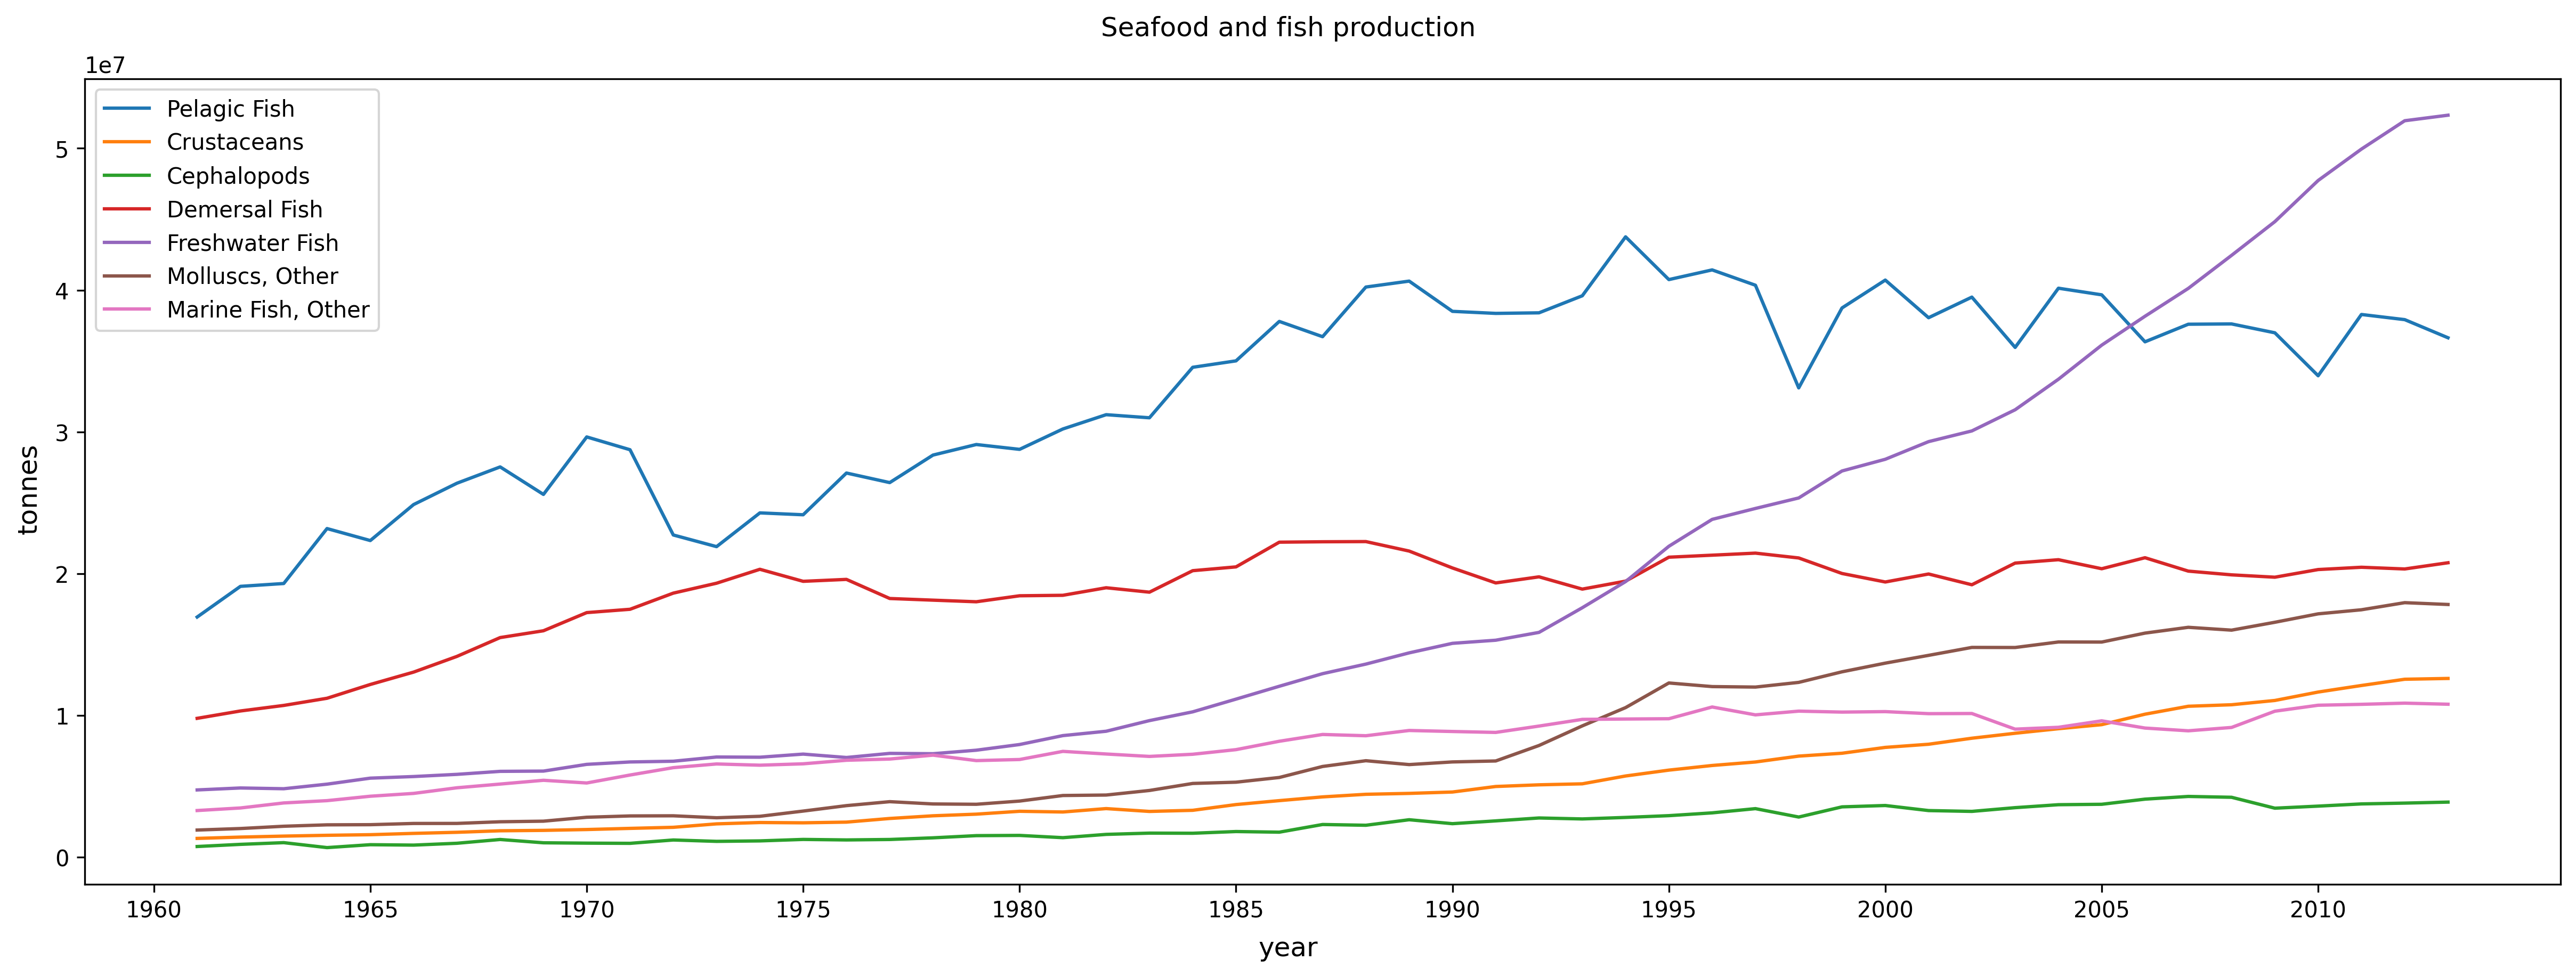

In [53]:
#Visualization by Year
fig, ax = plt.subplots(figsize = (16,6))
ax.set_facecolor('none')

plt.plot(SFF_prod[mask]['Year'],SFF_prod[mask]['Pelagic Fish'],label = 'Pelagic Fish')
plt.plot(SFF_prod[mask]['Year'],SFF_prod[mask]['Crustaceans'],label = 'Crustaceans')
plt.plot(SFF_prod[mask]['Year'],SFF_prod[mask]['Cephalopods'],label = 'Cephalopods')
plt.plot(SFF_prod[mask]['Year'],SFF_prod[mask]['Demersal Fish'],label = 'Demersal Fish')
plt.plot(SFF_prod[mask]['Year'],SFF_prod[mask]['Freshwater Fish'],label = 'Freshwater Fish')
plt.plot(SFF_prod[mask]['Year'],SFF_prod[mask]['Molluscs, Other'],label = 'Molluscs, Other')
plt.plot(SFF_prod[mask]['Year'],SFF_prod[mask]['Marine Fish, Other'],label = 'Marine Fish, Other')

ax.set_xticks(range(1960, 2015, 5))
plt.legend()
fig.suptitle("Seafood and fish production")
fig.supylabel("tonnes")
fig.supxlabel('year')

In [57]:
#Focusing on Pelagic Fish by Entity
#Pelagic fish live in the pelagic zone of ocean or lake waters—being neither close to the bottom nor near the shore
colors=['#99aab5','#3b5998','#8b9dc3','#dfe3ee','#f7f7f7','#b3cde0','#6497b1']

fig = px.treemap(data_frame=Sff,path=['Entity'],values='Pelagic Fish',width=800, height=400)
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=5, l=5, r=5, b=5))

In [58]:
#Focusing on Demersal Fish by Entity
#Demersal fish are fish that live and feed on or near the bottom of water bodies, in contrast with pelagic fish
colors=['#e8e8e8','#ffffff','#a3bbb6','#768c87','#000000']
fig = px.treemap(data_frame=Sff,path=['Entity'],values='Demersal Fish',width=800, height=400)
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=5, l=5, r=5, b=5))

In [61]:
#Focusing on Freshwater Fish by Entity
#Freshwater fish are those that spend some or all of their lives in fresh water, such as rivers and lakes, with a salinity of less than 1.05%.
colors=['#d9ead3','#e4f5de','#e7efe4','#f0f5ef','#f9fdf7']

fig = px.treemap(data_frame=Sff,path=['Entity'],values='Freshwater Fish',width=800, height=400)
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=5, l=5, r=5, b=5))

In [90]:
###Check sustainable dataset, stating fish stocks within sustainable level
FSsustain.sample(5)

,Entity,Code,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
3,Eastern Central Pacific,NaN,2017,86.666667,13.333333
30,World,OWID_WRL,1974,90.000000,10.000000
22,Southwest Pacific,NaN,2015,74.074070,25.925930
8,Northeast Central Atlantic,NaN,2015,73.469390,26.530610
2,Eastern Central Pacific,NaN,2015,86.666670,13.333330


In [91]:
#Analyze by year and world widely
Fmask = FSsustain['Entity'].str.contains('World')
FS = FSsustain[Fmask].dropna().groupby(['Year'],as_index = False)['Share of fish stocks within biologically sustainable levels (FAO, 2020)'].mean()
FS

,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)"
0,1974,90.000000
1,1978,91.463415
2,1979,86.982249
3,1981,86.419753
4,1983,83.333333
5,1985,81.818182
6,1987,75.675676
7,1989,73.369565
8,1990,81.868132
9,1992,76.777251


Text(0.5, 0.01, 'year')

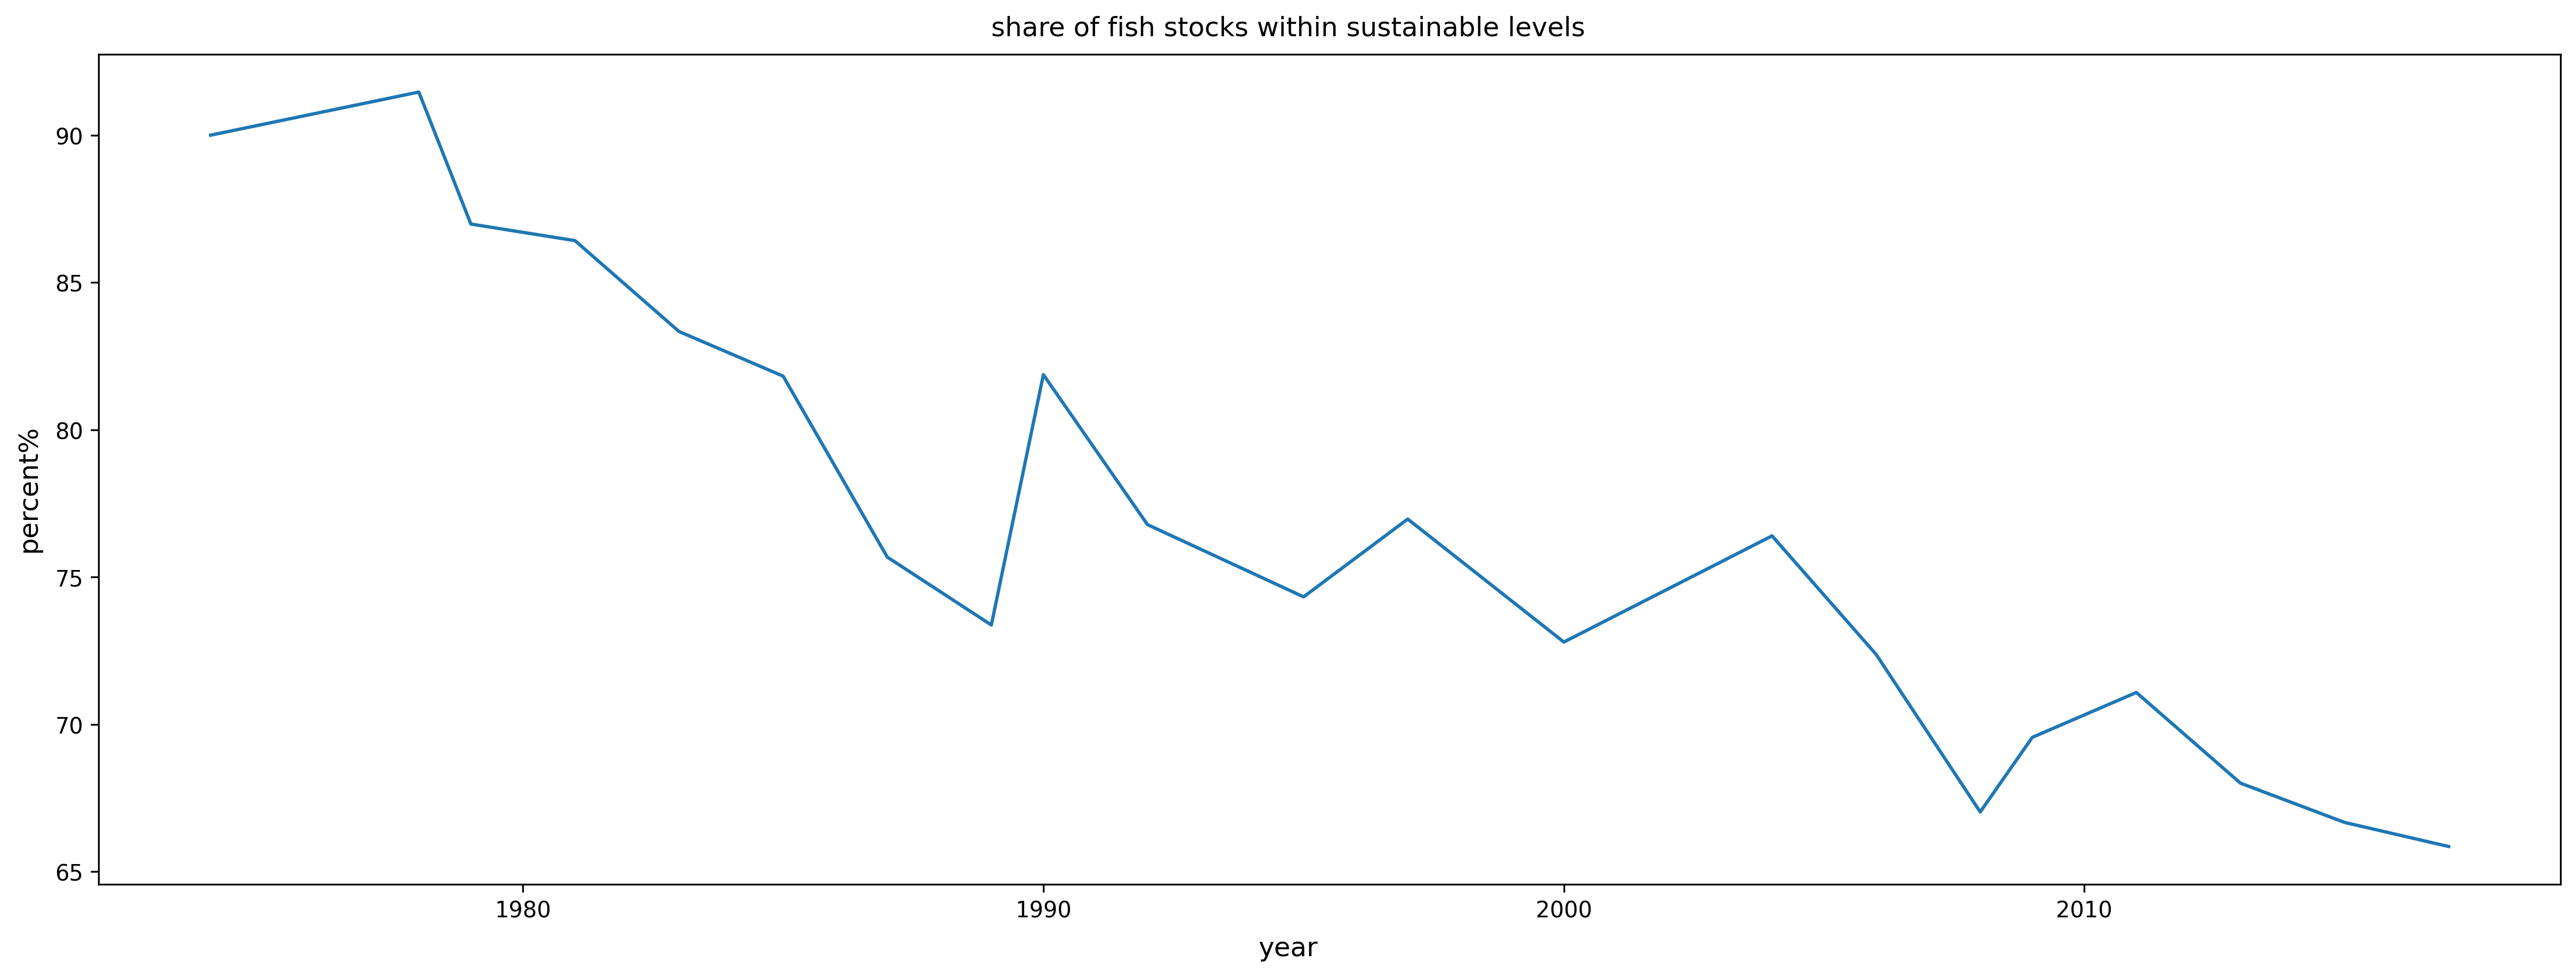

In [67]:
#Visualize by year, fish stocks within sustainable level - worldwidely
fig, ax = plt.subplots(figsize = (16,6))
ax.set_facecolor('none')

plt.plot(FS['Year'],FS['Share of fish stocks within biologically sustainable levels (FAO, 2020)'])
fig.suptitle("share of fish stocks within sustainable levels")
fig.supylabel("percent%")
fig.supxlabel('year')

In [69]:
#check the sustainable level & overexploited level by Entity in year 2017
mask1 = FSsustain['Entity'].str.contains('World')
mask2 = FSsustain['Year'] == 2017
F1 = FSsustain.loc[~mask1.reindex(FSsustain.index, fill_value = False)]
F1
F2 = F1[mask2.reindex(F1.index, fill_value = False)]
F2.sample(5)

,Entity,Code,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
13,Northwest Central Atlantic,NaN,2017,56.250000,43.750000
25,Western Central Atlantic,NaN,2017,61.403509,38.596491
19,Southeast Pacific,NaN,2017,45.454545,54.545455
23,Southwest Pacific,NaN,2017,84.615385,15.384615
27,Western Central Pacific,NaN,2017,77.551020,22.448980


In [70]:
#The overexploited situation
colors=['#99aab5','#3b5998','#8b9dc3','#dfe3ee','#f7f7f7','#b3cde0','#6497b1']

fig = px.treemap(data_frame=F2,path=['Entity'],values='Share of fish stocks that are overexploited',width=800, height=400,hover_data=['Year'])
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=5, l=5, r=5, b=5))

In [77]:
#Check Consumption dataset, contains fish-and seafood consumption per capita
Consume.dropna()
Conmask = Consume['Entity'].str.contains("World")
CON = Consume[~Conmask].dropna()
CON.sample(5)

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
8153,Romania,ROU,1998,3.03
5783,Macao,MAC,2014,62.39
4261,Honduras,HND,1970,1.52
8059,Portugal,PRT,1961,55.76
7366,North Macedonia,MKD,2017,6.21


In [78]:
#analyze consumption data(fish and seafood consumption per capita)
#Top 3 seafood consumption countries are Maldives, Iceland and Kiribati

colors=['#d9ead3','#e4f5de','#e7efe4','#f0f5ef','#f9fdf7','#a3bbb6','#768c87','#000000']
fig = px.treemap(data_frame=CON,path=['Entity'],values='Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)',width=800, height=400,hover_data=['Year'])
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=5, l=5, r=5, b=5))

In [82]:
#Check the dataset of 'global fishery catch by sector' 
FC_sect

,Entity,Code,Year,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence
0,World,OWID_WRL,1950,7526795,5874170,14566338,268260,2677833
1,World,OWID_WRL,1951,8278304,6278225,15417937,284319,2704471
2,World,OWID_WRL,1952,8272109,7230311,16463942,293558,2728141
3,World,OWID_WRL,1953,8469284,7172937,17163789,292070,2753098
4,World,OWID_WRL,1954,9226926,8012930,18340199,304398,2895153
...,...,...,...,...,...,...,...,...
56,World,OWID_WRL,2006,21417851,9530758,78480816,790270,3792749
57,World,OWID_WRL,2007,21097388,9725492,78861788,804477,3623797
58,World,OWID_WRL,2008,21111836,9568906,76840638,826843,3629819
59,World,OWID_WRL,2009,21828623,9369530,75728150,805632,3630156


Text(0.5, 0.01, 'year')

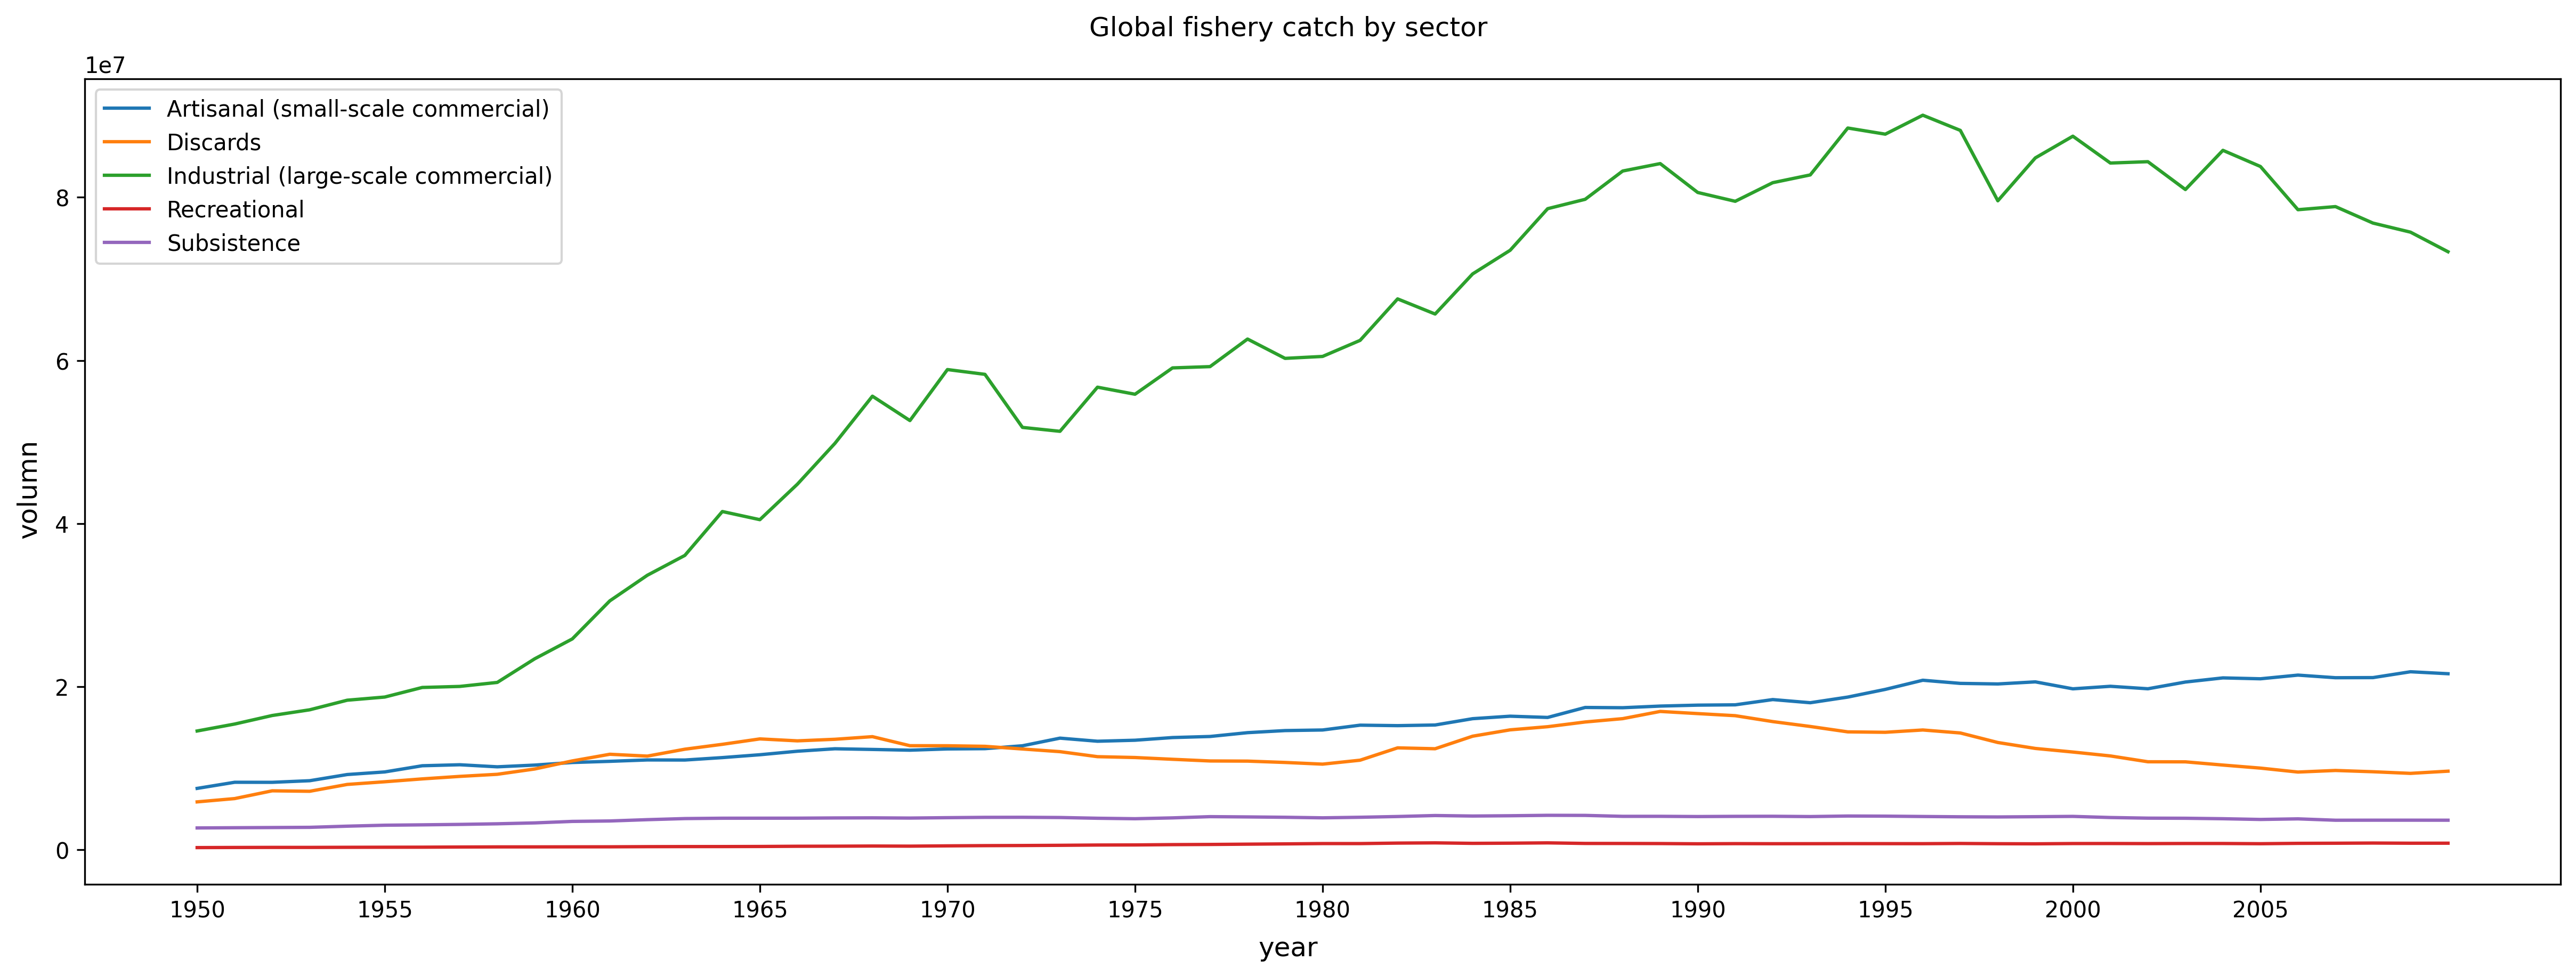

In [83]:
#Visualization
#Artisanal fishing consists of various small-scale, low tech, low capital, fishing practices undertaken by individual fishing households
#Discard are the portion of a catch of fish which is not retained on board during commercial fishing operations and is returned to the sea(often dead or dying)
#Industrial fishing involves high level of technology and impact. It usually brings big impact to a fishery.
#Recreational fishing, also called sport fishing or game fishing, is fishing for leisure, exercise or competition. 
#Subsistence means fishing for personal, family and community consumption or sharing.
fig, ax = plt.subplots(figsize = (16,6))
ax.set_facecolor('none')

plt.plot(FC_sect['Year'],FC_sect['Artisanal (small-scale commercial)'],label = 'Artisanal (small-scale commercial)')
plt.plot(FC_sect['Year'],FC_sect['Discards'],label = 'Discards')
plt.plot(FC_sect['Year'],FC_sect['Industrial (large-scale commercial)'],label = 'Industrial (large-scale commercial)')
plt.plot(FC_sect['Year'],FC_sect['Recreational'],label = 'Recreational')
plt.plot(FC_sect['Year'],FC_sect['Subsistence'],label = 'Subsistence')
ax.set_xticks(range(1950, 2010, 5))
plt.legend()
fig.suptitle("Global fishery catch by sector")
fig.supylabel("volumn")
fig.supxlabel('year')